In [45]:
#Predict the values for test data set and  get the confusion matrix

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [46]:
model=tf.keras.models.load_model('saved_model/covid_7') #Import saved model


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 35)                770       
                                                                 
 dropout_4 (Dropout)         (None, 35)                0         
                                                                 
 dense_6 (Dense)             (None, 55)                1980      
                                                                 
 dropout_5 (Dropout)         (None, 55)                0         
                                                                 
 dense_7 (Dense)             (None, 45)                2520      
                                                                 
 dropout_6 (Dropout)         (None, 45)                0         
                                                                 
 dense_8 (Dense)             (None, 35)               

In [48]:
covid_test=pd.read_csv("Test_cleaned.csv")

In [49]:
labels=['ID',"Unnamed: 0"]
covid_model=covid_test.drop(labels,axis=1) #drop columns like ID, unnamed 

In [50]:
predictions=model.predict(covid_model) #make predictions for the test dataset

In [51]:
#Convert prediction probabilities to covid variant numbers
variants=[]
for i in range(0,len(predictions)):
    max=np.max(predictions[i])
    for j in range(0,6):
        if(predictions[i][j]==max):
            index=j+1
            break
    variants.append("Variant "+str(index))

In [52]:
#Create pandas dataframe
data={
    'ID':covid_test['ID'],
    'Variant':variants
}

df=pd.DataFrame(data)


In [53]:
#Create csv file for final predictions and final submission.
df.to_csv("Submission_7.csv")

In [54]:
#Confusion Matrix for training set

covid_train=pd.read_csv('Train_cleaned.csv')
covid_train_matrix=covid_train.drop(['ID','Variant','Unnamed: 0'],axis=1)

prediction_probs=model.predict(covid_train_matrix)
#prediction values changed from one-hot encoding to a linear vector
predictions_train=[]
for i in range(0,len(prediction_probs)):
    max=np.max(prediction_probs[i])
    for j in range(0,6):
        if(prediction_probs[i][j]==max):
            index=j
            break
    predictions_train.append(index)

In [55]:
matrix=confusion_matrix(np.array(covid_train['Variant']),predictions_train) #Get the confusion matrix

In [56]:
print(matrix)

[[166   0   0   0   0   0]
 [  0 101   0   2   0   0]
 [  0   0  44   3   0   0]
 [  0   0   0  36   0   0]
 [  0   0   0   0  27   0]
 [  0   0   0   0   0  11]]


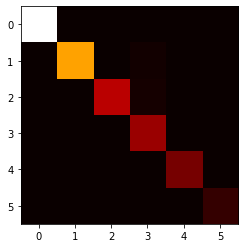

In [44]:
#Visualize the confusion matrix
plt.imshow(matrix, cmap='hot', interpolation='nearest')

In [ ]:
#The image shows that the model is confused about very few labels as the colors
#as the image color around the diagnol of the matrix is almost of the same intensity.